XENON1T limits


bla bla


In [1]:
from xe_likelihood import Spectrum,BinwiseInference, xenon1t_published

import scipy.stats as sps
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import time

For wimprates

In [2]:
import wimprates
import numericalunits as nu

nu.GeVm = nu.GeV / (nu.c0**2)
def wimprate_wimp_spectrum(e, M=50, interaction = "SI"):
    return wimprates.rate_wimp(e*nu.keV, mw = M*nu.GeVm, sigma_nucleon=1e-45*nu.cm**2,interaction=interaction)* (nu.keV * (1000 * nu.kg) * nu.year)

In [3]:
xenon_inference = BinwiseInference.from_xenon1t_sr(spectrum = sps.norm(10, 0.1).pdf)
t0=time.time()
limit_asymptotic=[]
limit_nonasymptotic=[]
wimp_masses = np.logspace(np.log10(6),np.log10(1000),40)
for i, wimp_mass in enumerate(tqdm(wimp_masses, desc="Looping on wimp masses")):
#for i, wimp_mass in enumerate((wimp_masses)):
 #   print (str(wimp_mass)+"GeV "+str(i)+"/"+str(len(wimp_masses)))
    E = np.logspace(-1,2,301)
    dRdE = wimprate_wimp_spectrum(E,wimp_mass,"SI")
    s = Spectrum.from_sample(E,dRdE,str(wimp_mass)+"GeV/c2 SI WIMP")
    xenon_inference.spectrum = s
    limit_nonasymptotic.append(xenon_inference.compute_ul(cl=0.1, asymptotic=False))
    limit_asymptotic.append(xenon_inference.compute_ul(cl=0.1, asymptotic=True))
print (time.time()-t0)

/home/joe/temp/ipykernel_93654/3684974290.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, wimp_mass in enumerate(tqdm(wimp_masses, desc="Looping on wimp masses")):


Looping on wimp masses:   0%|          | 0/40 [00:00<?, ?it/s]

/home/joe/Sandbox/public_NR_likelihood/xe_likelihood/binwise_inference.py:172: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return np.asarray([quad(self.spectrum, ed, eu)[0] for ed, eu in
/home/joe/Sandbox/public_NR_likelihood/xe_likelihood/binwise_inference.py:172: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return np.asarray([quad(self.spectrum, ed, eu)[0] for ed, eu in
/home/joe/.cache/pypoetry/virtualenvs/xe-likelihood-GvGrwz83-py3.9/lib/python3.9/site-p

86.61114549636841


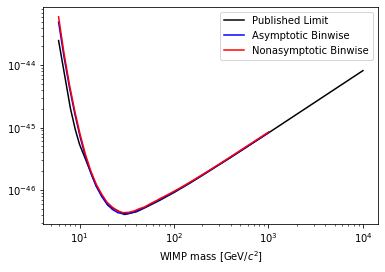

In [4]:
limit_asymptotic45=1e-45*np.array(limit_asymptotic)
limit_nonasymptotic45=1e-45*np.array(limit_nonasymptotic)
plt.clf()
plt.plot(xenon1t_published[:,0], xenon1t_published[:,1],color="k",label="Published Limit")
plt.plot(wimp_masses,limit_asymptotic45,color="blue",label="Asymptotic Binwise")
plt.plot(wimp_masses,limit_nonasymptotic45,color="red",label="Nonasymptotic Binwise")
plt.legend()
plt.xlabel("WIMP mass [GeV$/c^2$]")
plt.yscale("log")
plt.xscale("log")
plt.show()